# Build a K-Means model for image optimization. 

We can apply clustering on the image's color values. Here's a step-by-step approach for the task:

- Read the image and convert it into a suitable format for K-Means clustering (i.e., extracting the RGB color values of each pixel).

- Apply K-Means clustering to the image, grouping the pixel colors into a specific number of clusters (the final number of colors you want).

- Visualize the initial state of the image with all its pixels.

- Apply K-Means to find centroids and optimize the image with the reduced color palette.

- Display the final image with the clustered colors and compare it to the original.

## Imports

- numpy: Used for handling arrays and mathematical operations.

- matplotlib.pyplot: Used for plotting graphs and visualizations.

- KMeans from sklearn.cluster: This is the K-Means algorithm used for clustering.

- MinMaxScaler from sklearn.preprocessing: This normalizes the pixel values to a range between 0 and 1, which helps improve the performance of the K-Means algorithm.

- Image from PIL: Used for loading and manipulating images            

In [32]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from PIL import Image

## Loading the Image:

- Image.open(img_path): Opens the image from the given file path and stores it in the img variable.

In [33]:
# Load image
img_path = 'D:/ML/Projects/K-Means-Clustering/car.jpg'
img = Image.open(img_path)

## Convert to RGB and Reshape:

- img.convert('RGB'): Converts the image to RGB format. If it's in another format (like grayscale), it ensures the image is in three channels (Red, Green, Blue).

- np.array(img): Converts the image to a NumPy array, where each pixel is represented as a [Red, Green, Blue] triplet.

- img_data.shape: Retrieves the dimensions of the image (height, width, and 3 channels for RGB).

- img_data.reshape((-1, 3)): Flattens the image into a 2D array with each pixel represented as a single row of 3 values (RGB). The -1 in the reshape means "flatten the height and width into one dimension".

In [34]:
# Convert the image to RGB and reshape it for KMeans
img = img.convert('RGB')
img_data = np.array(img)
height, width, _ = img_data.shape  # Get original image dimensions
img_data_reshaped = img_data.reshape((-1, 3))  # Flatten the image for clustering

## Normalize the Image Data:

- MinMaxScaler(): This scales the pixel values (which are typically in the range 0-255) to a range between 0 and 1.

- scaler.fit_transform(img_data_reshaped): Fits the scaler to the image data and transforms the pixel values to the range [0, 1].

In [35]:
# Normalize the data for better KMeans performance
scaler = MinMaxScaler()
img_data_normalized = scaler.fit_transform(img_data_reshaped)

## K-Means Clustering:

- k = 5: Specifies the number of clusters (or colors) you want to reduce the image to. You can adjust this number based on how many colors you want in the final image.

- KMeans(n_clusters=k): Initializes the K-Means model with k clusters.

- kmeans.fit(img_data_normalized): Fits the K-Means model to the normalized image data, i.e., it performs the clustering to identify k centroids (colors) that represent the image data.

In [36]:
# Apply K-Means clustering
k = 5  # Number of clusters (colors)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(img_data_normalized)

KMeans(n_clusters=5, random_state=42)

## Get the Centroids (Final Colors) and Labels:

- kmeans.cluster_centers_: This gives the k centroids found by K-Means. Each centroid is an RGB value that represents the average color of all pixels in a cluster.

- scaler.inverse_transform(kmeans.cluster_centers_): Since the data was normalized earlier, this line reverses the normalization (scaling) process, converting the centroids back to their original range (0-255).

- kmeans.labels_: This assigns a label (or cluster) to each pixel in the image, indicating which centroid (color) it belongs to.

In [37]:
# Get the cluster centers (final colors)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
labels = kmeans.labels_

## Reconstruct the Optimized Image:

- centroids[labels]: For each pixel, the corresponding centroid (color) is selected based on the label assigned during clustering.

- .reshape(img_data.shape): The centroids[labels] array is reshaped to match the original image shape (height, width, 3), so it can be displayed as an image.

In [38]:
# Create the new image by replacing each pixel with its centroid color
optimized_img_data = centroids[labels].reshape(img_data.shape)

## Visualize the Original and Optimized Images:

- plt.subplots(1, 2, figsize=(12, 6)): Creates a figure with two subplots, one for the original image and one for the optimized image.

- axes[0].imshow(img): Displays the original image on the left subplot.

- axes[1].imshow(optimized_img_data.astype(int)): Displays the optimized image on the right subplot. The .astype(int) ensures that the pixel values are integers (since K-Means centroids might be floating-point values).

- axes[0].set_title("Original Image") and axes[1].set_title(f"Optimized Image with {k} Colors"): Adds titles to the subplots.

- axes[0].axis('off') and axes[1].axis('off'): Hides the axis labels and ticks for a cleaner view of the images.

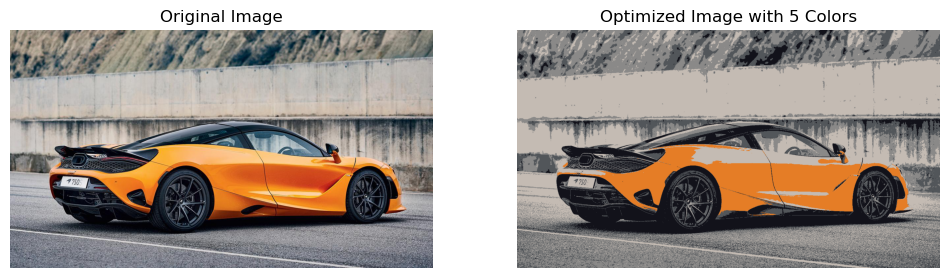

In [39]:
# Visualizing the starting (original) and final (optimized) images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(optimized_img_data.astype(int))
axes[1].set_title(f"Optimized Image with {k} Colors")
axes[1].axis('off')

plt.show()

## Visualize the Color Palette (Centroids):

- This creates a horizontal color bar showing the centroids (the final colors used in the optimized image).

- ax.imshow([centroids.astype(int)]): Displays the centroids as a bar of colors.

- ax.axis('off'): Hides the axis for a cleaner look.

- plt.title(f"Final Colors Used (Centroids)"): Adds a title indicating that the colors displayed are the centroids used in the optimization.

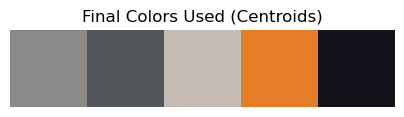

In [40]:
# Show the cluster centers (the colors used)
fig, ax = plt.subplots(1, 1, figsize=(6, 1))
ax.imshow([centroids.astype(int)])
ax.axis('off')
plt.title(f"Final Colors Used (Centroids)")
plt.show()

## Output the Centroids (Final Colors):

- This prints the RGB values of the centroids (the final colors used to represent the image).

In [41]:
# Output values: the initial and final centroids
print("Initial RGB values (centroids):")
print(centroids)

Initial RGB values (centroids):
[[138.59724768 137.69231531 136.96930172]
 [ 82.59915833  86.29191095  90.35822003]
 [196.64850442 187.89401198 179.00177667]
 [229.90250884 125.07594952  38.99100254]
 [ 18.4122781   18.98238492  26.11370358]]
